In [2]:
import pandas as pd

df = pd.read_csv('./files/BASIL_final.csv')

df.head()

,Unnamed: 0,PMID,Bioactive,Effect Source,Health Effects,Population,Other Compounds,MetaMap Health Effects Terms,MetaMap Population Terms,population,bias,Unsuccessful Effects
0,0,28453471,Cyclohexane,3,NaN,"['Young adults', 'Down syndrome without dement...","['scyllitol', 'Inositol']",NaN,"[['Dementia', 'C0497327', 'C10.228.140.380;F03...",NaN,0.565093,NaN
1,1,26636532,Cyclohexane,2,"['inflammatory', 'metabolic', 'oxidative', 'en...",['premenopausal women'],"['Betaine', 'Inositol']","[['Breast Density', 'C1659543', 'E01.370.600.1...","[['Premenopausal - menopausal status', 'C02797...",76.0,0.080494,NaN
2,2,22248028,Cyclohexane,3,"['enhances radiosensitivity', 'inhibits surviv...","['lung adenocarcinoma xenograft', 'A549 cells']","['BIRC5 protein, human', 'Hypoxia-Inducible Fa...","[['Cardiac Arrest', 'C0018790', 'C14.280.383']...","[['A549 Cells', 'C4277577', 'A11.251.210.190.0...",NaN,0.053479,NaN
3,3,38212353,Spermine,5,NaN,"[""Huntington's disease individuals""]","['Polyamines', 'Arginine', 'Glucose']",NaN,"[['Huntington Disease', 'C0020179', 'C10.228.1...",NaN,0.186809,NaN
4,4,37116228,Spermine,3,NaN,['patients with sepsis-induced organ failure'],"['kukoamine B', 'Caffeic Acids', 'Spermine', '...",NaN,"[['Induce (action)', 'C0205263', ''], ['Patien...",44.0,0.234363,NaN


In [4]:
from get_papers import search_articles_by_keyword, fetch_article_xml
from tools.tools import get_PM_info

#Let's extract information on the compound "Daidzein"
bioactive = "Daidzein"

#Note that this only extracts the articles that were published in 2025. Adjust get_papers if you need
article_ids = search_articles_by_keyword('Randomized Controlled Trial[Publication Type]) AND ("'+bioactive+'"[Title/Abstract] OR "'+bioactive+'"[Supplementary Concept] OR "'+bioactive+'"[MeSH Terms])')

article_ids

['39681617']

In [7]:
pubmed_xml = fetch_article_xml(article_ids=article_ids, database='PubMed') #extract information
papers = get_PM_info(pubmed_xml, article_ids) #structure information
papers

[('39681617',
  'Dietary intake of isoflavones and coumestrol and risk of pancreatic cancer in the prostate, lung, colorectal, and ovarian cancer screening trial.',
  'Although phytoestrogens modulated pancreatic tumour growth in experimental studies, it remains unclear whether phytoestrogen intake is associated with pancreatic cancer.Of 92,278 persons who completed the Diet History Questionnaire in the Prostate, Lung, Colorectal, and Ovarian Cancer Screening Trial, 346 were diagnosed with pancreatic cancer within a median follow-up of 9.4 years. Cox proportional hazards regression was used to evaluate pancreatic cancer risk in relation to phytoestrogen intake.After adjustment for confounders, intakes of glycitein and formononetin were associated with a reduced risk of pancreatic cancer [highest vs. lowest quartile, hazard ratio (HR) (95% confidence interval (CI)) for glycitein: 0.60 (0.39, 0.92); P for linear trend: 0.01; HR for formononetin: 0.51 (0.37, 0.70); P for linear trend: 0.0

In [12]:
#Analyze text using an LLM

from prompt_health_effects import get_prompt, get_completion

titles = [i[1] for i in papers]
abstracts = [i[2] for i in papers]

completions = []
for title, abstract in zip(titles, abstracts):
    prompt = get_prompt(title=title, abstract=abstract, compound_name=bioactive)
    completion = get_completion(prompt)
    completions.append(completion)
    print(completion)

- Study Focus: (4) Comparative Analysis (Daidzein or its derivatives vs. Other Compounds or treatments)
- Health Benefits: [Reduced risk of pancreatic cancer]
- Population: [Ever smokers]


In [30]:
from structure_llm_output import structure_output

structured_out = structure_output(completions[0])

structured_out

[['4', ['Reduced risk of pancreatic cancer'], ['Ever smokers']]]

In [33]:
#Map output(s) to the UMLS using MetaMap
 
from NER import NER

health_effects = NER(structured_out[0][1])
population = NER(structured_out[0][2])

print(health_effects, population)

['Pancreatic carcinoma', 'C0235974', 'x.x.x.x'] None


In [32]:
from reviewer import robotreview

#use robotreviewer to get the bias (among other things) 
review = robotreview([[titles[0], abstracts[0]]])
bias = review[0]['bias_ab']

bias

0.39549285645206


In [35]:
#get some information on our bioactive using ChEMBL
#please view the respective websites to get information on FooDB or PhenolExplorer

from tools.chembl_extract import get_chembl_attributes

get_chembl_attributes(bioactive)

1


{'atc_classifications': [],
 'availability_type': None,
 'biotherapeutic': None,
 'black_box_warning': 0,
 'chebi_par_id': 28197,
 'chemical_probe': 0,
 'chirality': 2,
 'cross_references': [],
 'dosed_ingredient': False,
 'first_approval': None,
 'first_in_class': 0,
 'helm_notation': None,
 'indication_class': None,
 'inorganic_flag': 0,
 'max_phase': '2.0',
 'molecule_chembl_id': 'CHEMBL8145',
 'molecule_hierarchy': {'active_chembl_id': 'CHEMBL8145',
  'molecule_chembl_id': 'CHEMBL8145',
  'parent_chembl_id': 'CHEMBL8145'},
 'molecule_properties': {'alogp': '2.87',
  'aromatic_rings': 3,
  'cx_logd': '1.77',
  'cx_logp': '2.73',
  'cx_most_apka': '6.48',
  'cx_most_bpka': None,
  'full_molformula': 'C15H10O4',
  'full_mwt': '254.24',
  'hba': 4,
  'hba_lipinski': 4,
  'hbd': 2,
  'hbd_lipinski': 2,
  'heavy_atoms': 19,
  'molecular_species': 'ACID',
  'mw_freebase': '254.24',
  'mw_monoisotopic': '254.0579',
  'np_likeness_score': '0.83',
  'num_lipinski_ro5_violations': 0,
  'num_r

Node 'Daidzein' exists in the graph.
Degrees of 'Daidzein': 143
Neighbors of 'Daidzein': ['Postmenopausal state', 'Reduced', 'Hot flushes', 'Premenopausal - menopausal status', 'Menopause', 'Plasma', 'Finding of body mass index', 'Breast', 'Biological Absorption', 'Bone Density', 'Body Site Modifier - Lower', 'Serum', 'Well adult', 'Malignant neoplasm of prostate', 'Menopausal symptom', 'Perimenopausal state', 'Estrogen Effect', 'Fasting', 'Ability to perform general manipulative activities', 'Osteopenia', 'Anabolism', 'peroxidation', 'Distance vision 6/9', 'Hypercholesterolemia', 'Urinary tract', 'physiological aspects', 'vasomotor symptom', 'Hypotension', 'Arterial Stiffness', 'Obesity', 'Resorption', 'Prehypertension', 'Fallopian Tubes', 'Increased thyroxine level', 'Oviposition', 'Weight Gain', 'high weight', 'Breeding', 'Marble', 'Does steer', 'Reduced serum uric acid', 'Waist Circumference', 'Menopausal discomfort', 'Overweight', 'Coronary Arteriosclerosis', 'Gait normal', 'Low s

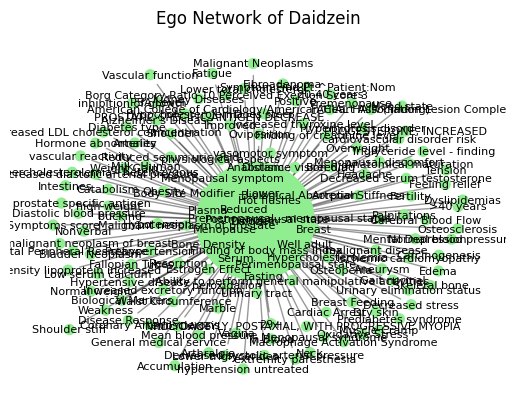

In [44]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def load_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

def create_multigraph(data):
    G = nx.MultiGraph()
    for entry in data:
        G.add_edge(entry["Bioactive"], entry["Condition"], weight=entry["Weight"])
    return G

def draw_graph(graph, node, radius=1):
    # Generate the ego graph of the specified node
    ego_net = nx.ego_graph(graph, node, radius=radius)

    node_size = [deg * 50 for node, deg in ego_net.degree()]
    pos = nx.spring_layout(ego_net, k=0.5, iterations=20)  # k regulates the distance between nodes

    # Draw the nodes
    nx.draw_networkx_nodes(ego_net, pos, node_size=node_size, node_color='lightgreen')
    nx.draw_networkx_edges(ego_net, pos, alpha=0.4)
    nx.draw_networkx_labels(ego_net, pos, font_size=8)

    # Set plot title
    plt.title(f"Ego Network of {node}")
    plt.axis('off')  # Turn off the axis
    plt.show()

def analyze_node(graph, node):
    if node in graph:
        print(f"Node '{node}' exists in the graph.")
        degrees = graph.degree(node)
        print(f"Degrees of '{node}':", degrees)
        neighbors = list(graph.neighbors(node))
        print(f"Neighbors of '{node}':", neighbors)
        draw_graph(graph, node)
    else:
        print(f"Node '{node}' does not exist in the graph.")

data = load_data('./files/weights_v1.json')
graph = create_multigraph(data)
analyze_node(graph, 'Daidzein')
